In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import find_peaks, peak_prominences
import os
import analysis_lag as ana
from phil_ducial_points import detrend

In [2]:
messungen = [
    {
        "date": "2021_02_02",
        "dish": 1,
        "er": "./Adenosine Oscillation/2021_02_02_Ado40s_dish1_2_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_02_Ado40s_dish1_2_CY.csv"
    },{
        "dish": 2,
        "date": "2021_02_04",
        "er": "./Adenosine Oscillation/2021_02_04_Ado40s_dish2_1_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_04_Ado40s_dish2_1_CY.csv"
    },{
        "dish": 3,
        "date": "2021_02_04",
        "er": "./Adenosine Oscillation/2021_02_04_Ado40s_dish3_1_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_04_Ado40s_dish3_1_CY.csv"
    },{
        "dish": 4,
        "date": "2021_02_05",
        "er": "./Adenosine Oscillation/2021_02_05_Ado40s_dish4_1_ER.csv",
        "cy": "./Adenosine Oscillation/2021_02_05_Ado40s_dish4_1_CY.csv"
    },{
        "dish": 3,
        "date": "2021_03_01",
        "er": "./Adenosine Oscillation/2021_03_01_Ado40s_dish3_2_ER.csv",
        "cy": "./Adenosine Oscillation/2021_03_01_Ado40s_dish3_2_CY.csv"        
    }
]



In [3]:
messung = 0
er = ana.ReadData(directory=messungen[messung]["er"])
cy = ana.ReadData(directory=messungen[messung]["cy"])

In [4]:
analyse = ana.CellData(er=er, cy=cy)

C:\Users\emsch\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


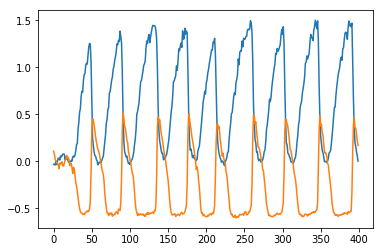

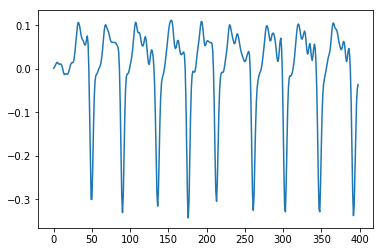

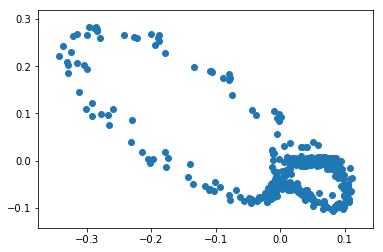

In [5]:
cell_number = 6

plt.plot(analyse.cells[cell_number].er.signal)
plt.plot(analyse.cells[cell_number].cy.signal)
plt.show()
plt.plot(analyse.cells[cell_number].er.derivative)
plt.show()
plt.scatter(analyse.cells[cell_number].er.derivative,analyse.cells[cell_number].cy.derivative)

-2.577

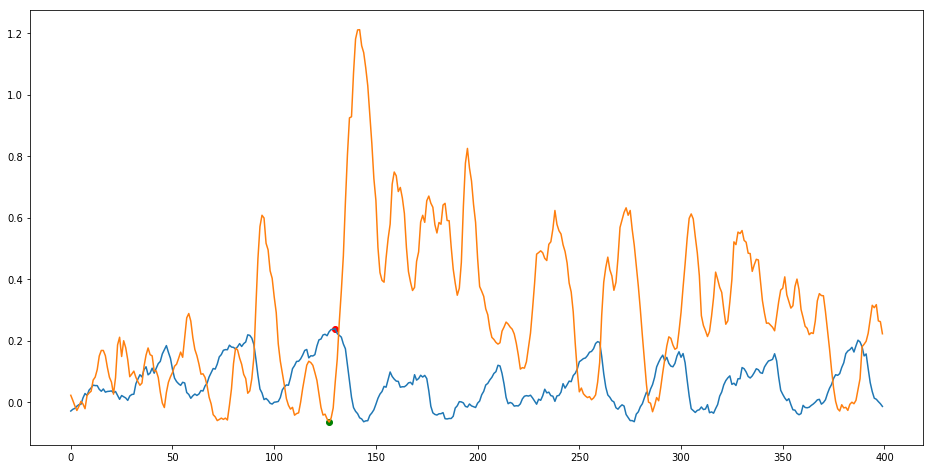

In [6]:
plt.figure(figsize=(16,8))
plt.plot(analyse.avg_signal_er)
plt.scatter(analyse.experiment_start_er, analyse.avg_signal_er[analyse.experiment_start_er], c="r")

plt.plot(analyse.avg_signal_cy)
plt.scatter(analyse.experiment_start_cy, analyse.avg_signal_cy[analyse.experiment_start_cy], c="g")

(analyse.experiment_start_cy - analyse.experiment_start_er)*0.859

before_during_after


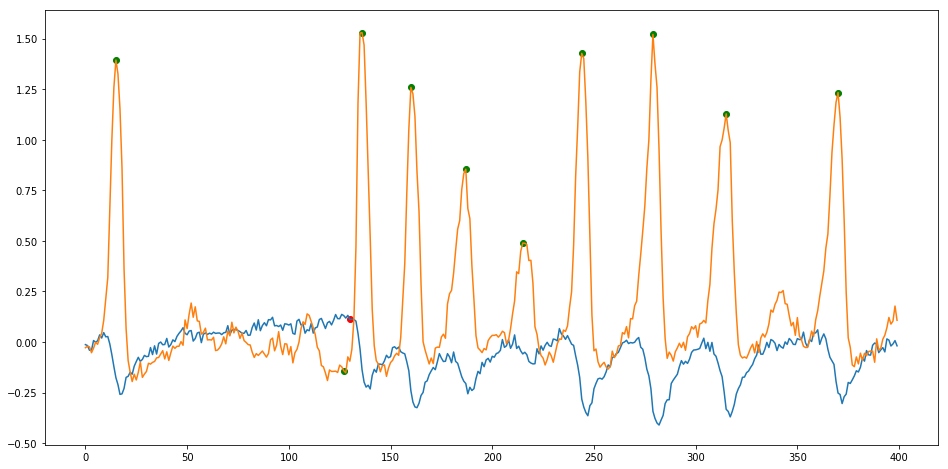

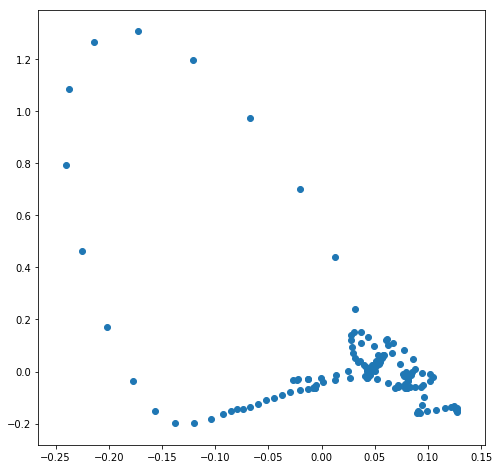

before_during_after


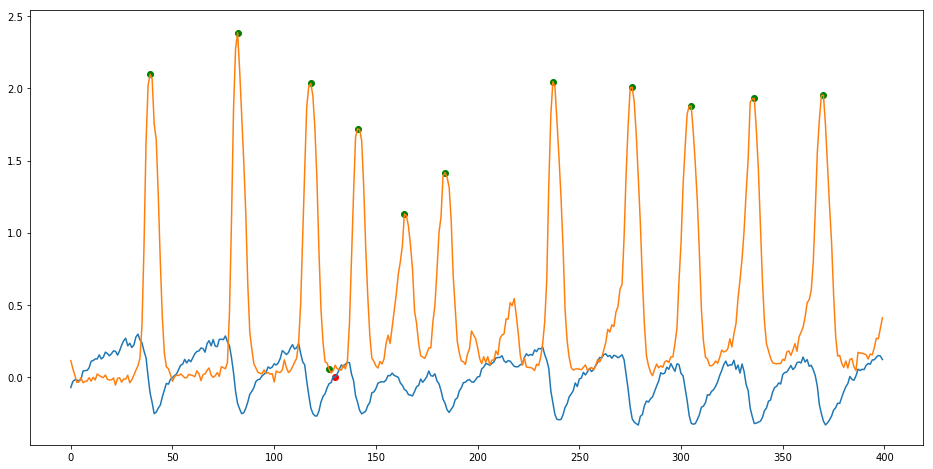

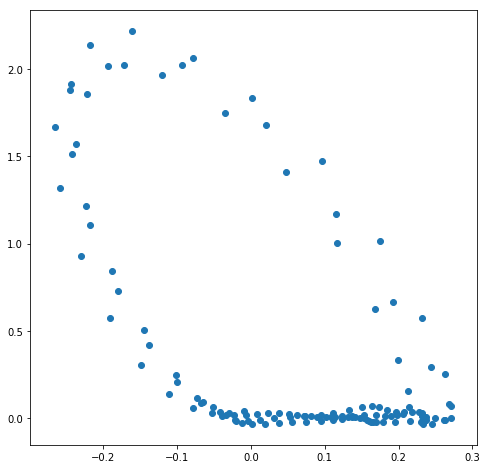

during


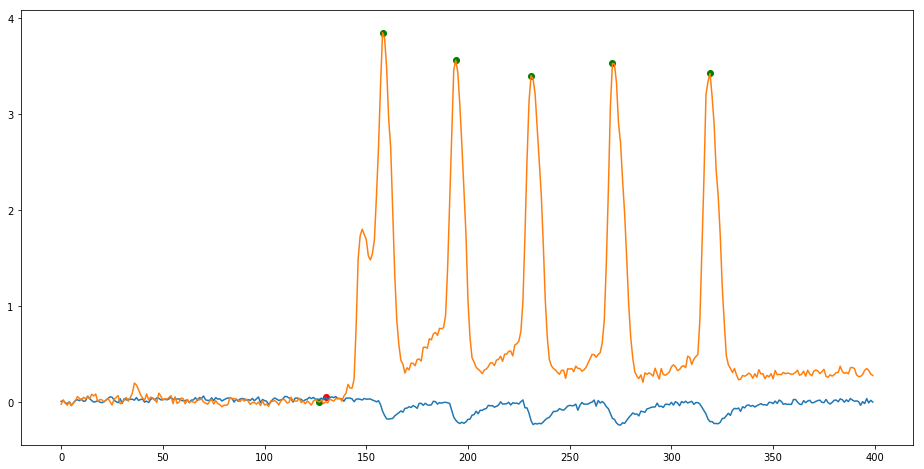

during_after


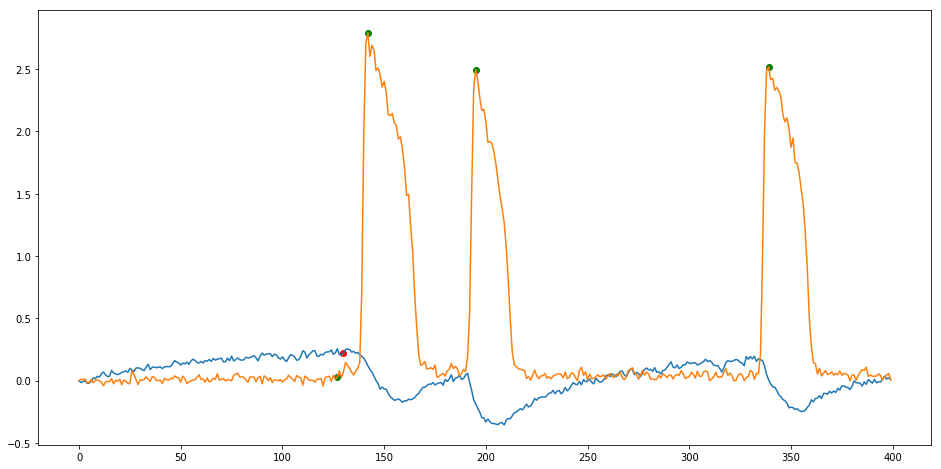

before_during_after


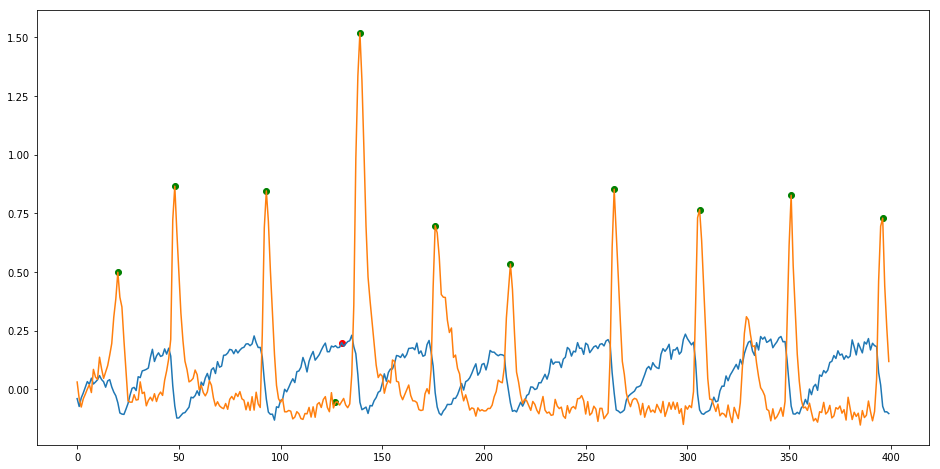

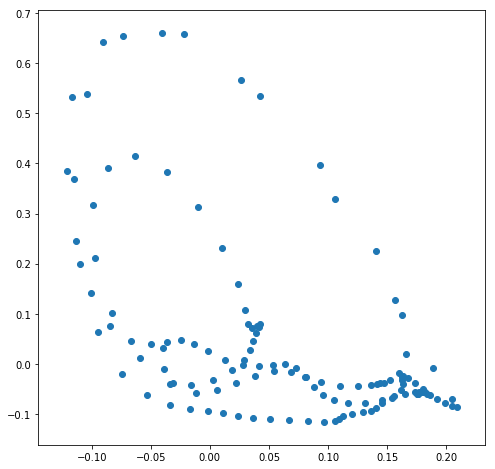

during


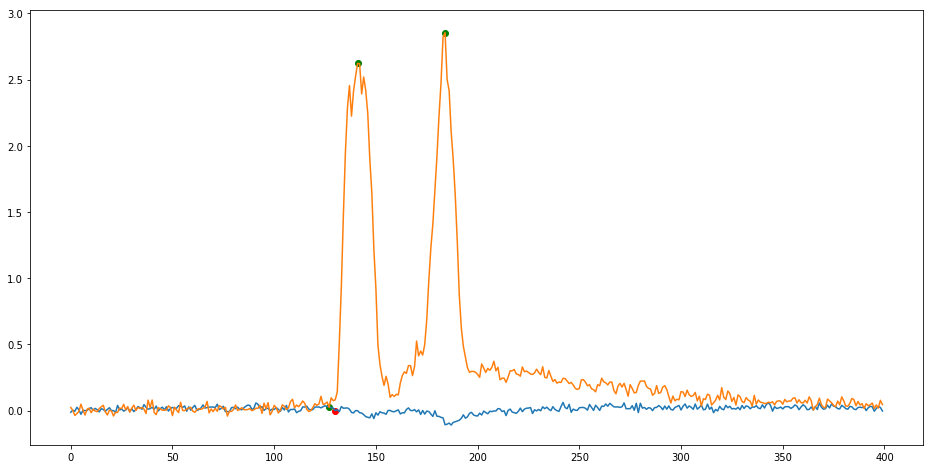

before_during_after


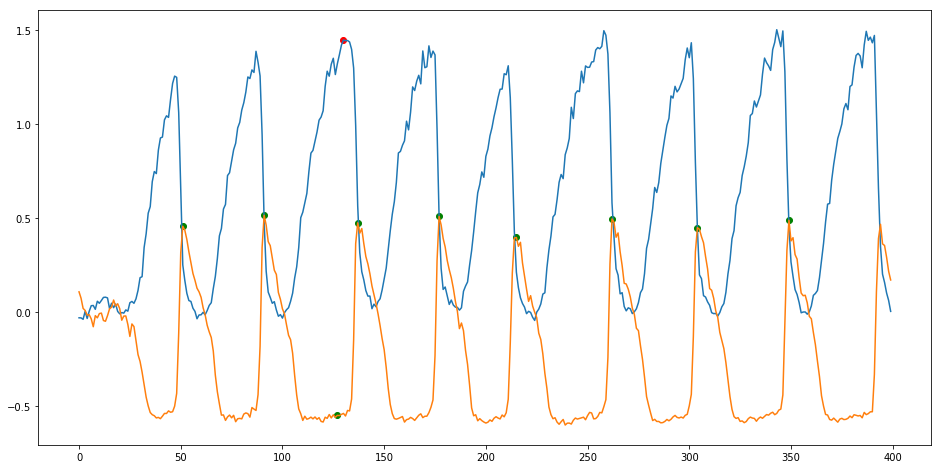

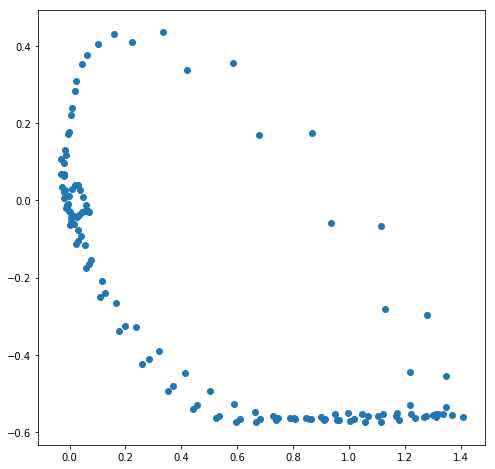

before_during_after


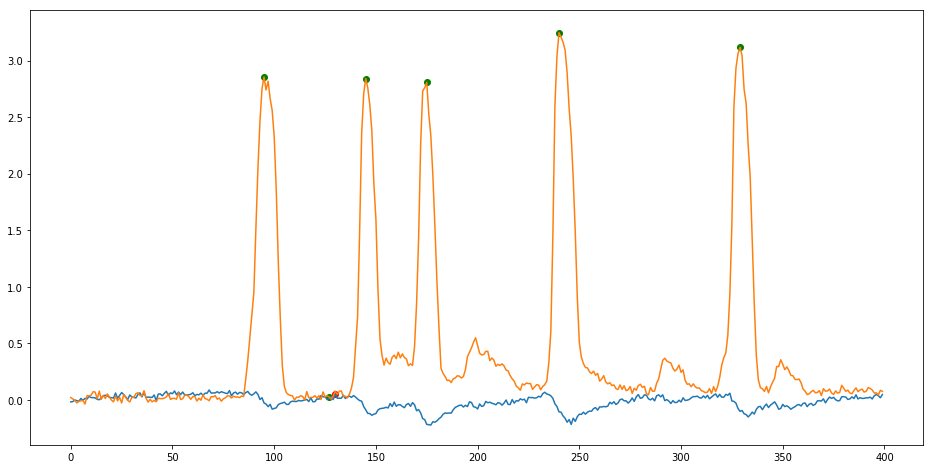

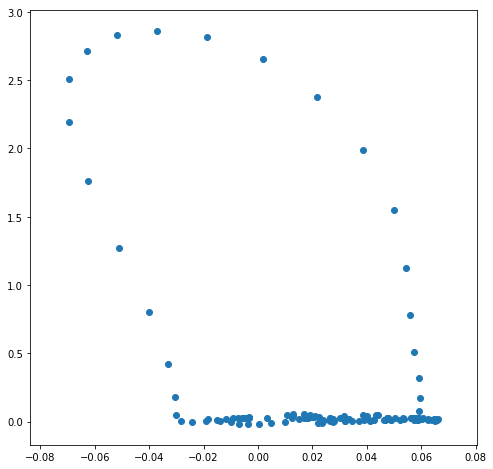

before_during


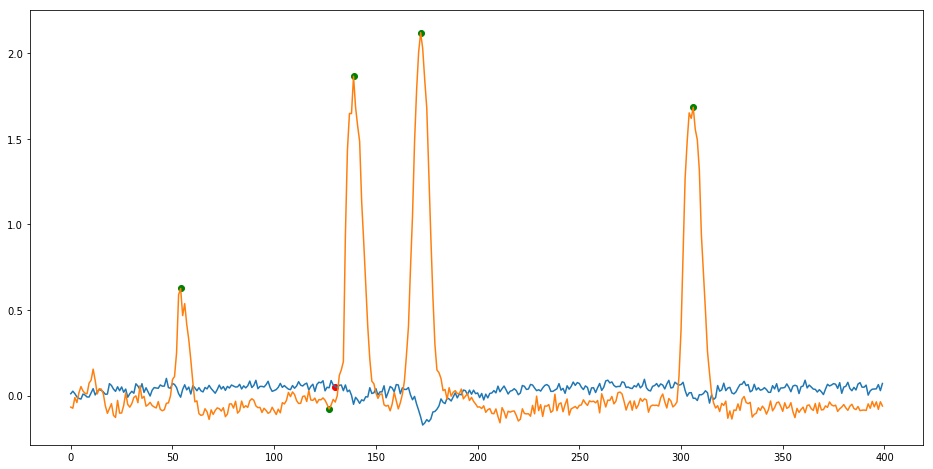

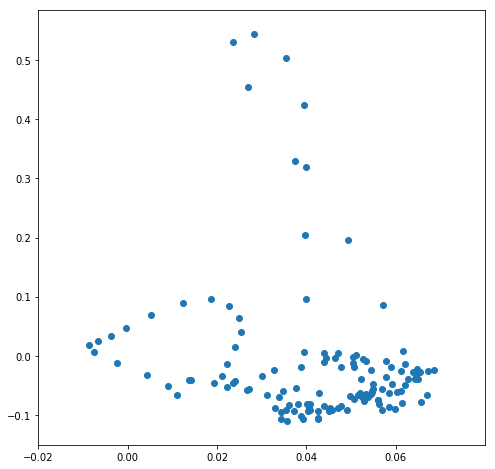

before_during_after


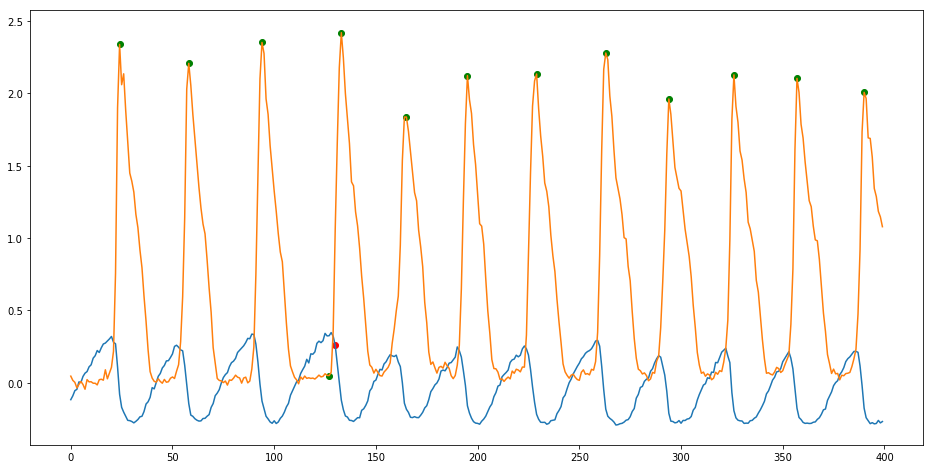

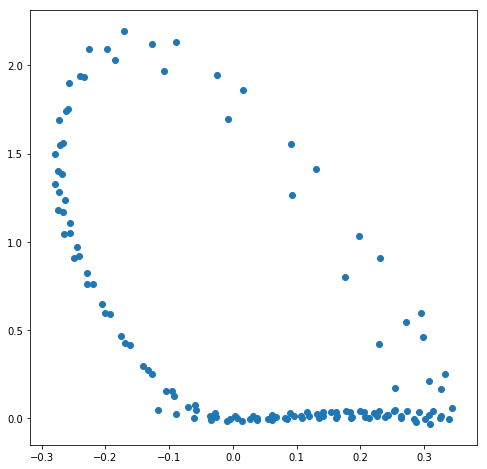

In [20]:
cells_no_oscillation_before = []
for cell in analyse.cells:

    #np.where((cell.cy.derivative>0)&(cell.cy.derivative>0))
    cell.get_oscillation_group(start_reaction=analyse.experiment_start_cy)
    print(cell.oscillation)
    
    if 'before' not in cell.oscillation:
        cells_no_oscillation_before.append(cell)
    
    peaks_cy, prominences = find_peaks(cell.cy.signal, prominence=0.5)
    #print(peaks_cy)
    
    plt.figure(figsize=(16,8))
    plt.plot(cell.er.signal)
    plt.plot(cell.cy.signal)
    
    plt.scatter(analyse.experiment_start_er, cell.er.signal[analyse.experiment_start_er], c="r")
    plt.scatter(analyse.experiment_start_cy, cell.cy.signal[analyse.experiment_start_cy], c="g")
    
    plt.scatter(peaks_cy, cell.cy.signal[peaks_cy], c="g")
    
    plt.show()
    
    if 'before' in cell.oscillation:
        plt.figure(figsize=(8,8))
        plt.scatter(cell.er.lowpass[:analyse.experiment_start_er], cell.cy.lowpass[:analyse.experiment_start_er])
        plt.show()

    #if len(peaks_cy)>2:
        #plt.plot(np.diff(peaks_cy))
    #plt.xcorr(cell.er.lowpass,cell.cy.lowpass)

## 

In [11]:
new_mean_er = np.mean([cell.er.signal for cell in cells_no_oscillation_before], axis=0)
new_mean_cy = np.mean([cell.cy.signal for cell in cells_no_oscillation_before], axis=0)

point_a = 0
point_b = np.argmin(new_mean_er)
experiment_start_er = np.argmax(detrend(new_mean_er[point_a:point_b]))

point_a = 0
point_b = np.argmax(new_mean_cy[:180])
print(point_b)
experiment_start_cy = np.argmin(detrend(new_mean_cy[point_a:point_b]))

146


-3.436

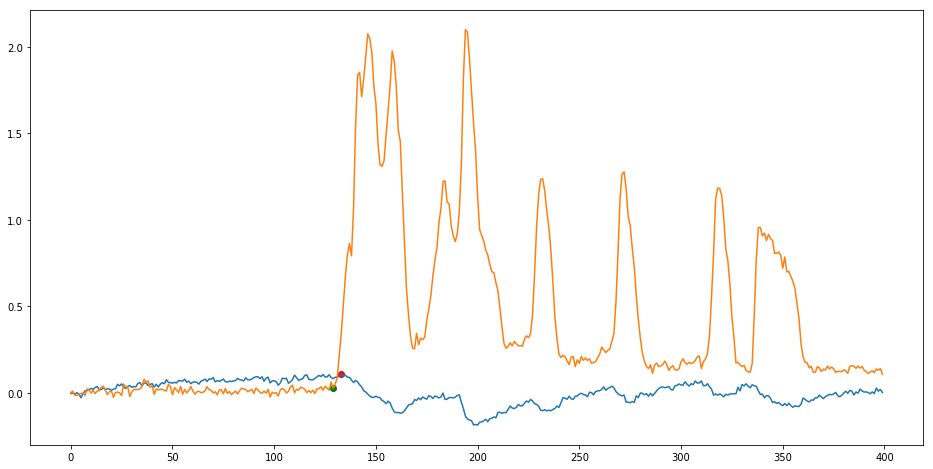

In [12]:
plt.figure(figsize=(16,8))
plt.plot(new_mean_er)
plt.scatter(experiment_start_er, new_mean_er[experiment_start_er], c="r")

plt.plot(new_mean_cy)
plt.scatter(experiment_start_cy, new_mean_cy[experiment_start_cy], c="g")

(experiment_start_cy - experiment_start_er)*0.859

In [ ]:
for cell in cells_no_oscillation_before:
    plt.figure(figsize=(16,8))
    plt.plot(cell.er.signal)
    plt.plot(cell.cy.signal)

In [ ]:
find_peaks(-analyse.cells[0].er.lowpass)

In [ ]:
#analyse.cells[0].calculate_lag()

In [ ]:
plt.figure(figsize=(28,10))

cell = analyse.cells[1]
cell.calculate_lag_flavors()

plt.plot(cell.time, cell.er.signal, c='xkcd:dark blue', alpha=0.5)
plt.plot(cell.time, cell.er.lowpass, c='xkcd:dark blue')

plt.plot(cell.time, cell.cy.signal, c='xkcd:slate blue', alpha=0.5)
plt.plot(cell.time, cell.cy.lowpass, c='xkcd:slate blue')


for match in cell.cy_peak.matches:
    x = [cell.time[match[1]], cell.time[match[0]]]
    y = [cell.er.lowpass[match[1]], cell.cy.lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='xkcd:melon')

#inflection point

for match in cell.cy_influx.matches:
    x = [cell.time[match[1]], cell.time[match[0]]]
    y = [cell.er.lowpass[match[1]], cell.cy.lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='xkcd:water blue')
    
    
for match in cell.er_influx.matches:
    x = [cell.time[match[1]], cell.time[match[0]]]
    y = [cell.er.lowpass[match[1]], cell.cy.lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='xkcd:rusty red')





for match in cell.er_peak.matches:
    x = [cell.time[match[1]], cell.time[match[0]]]
    y = [cell.er.lowpass[match[1]], cell.cy.lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='xkcd:tree green')

ax = plt.gca()
#ax.set_xlim([0, 80])

In [ ]:
plt.plot(cell.er_peak.lag)
plt.plot(cell.cy_peak.lag)
plt.plot(cell.er_influx.lag)
plt.plot(cell.cy_influx.lag)

In [ ]:
count=1
for cell in analyse.cells:
    print(count)
    count+=1
    plt.figure(figsize=(28,10))
    
    plt.plot(cell.time, cell.er.signal, c='xkcd:dark blue', alpha=0.5)
    plt.plot(cell.time, cell.er.lowpass, c='xkcd:dark blue')

    plt.plot(cell.time, cell.cy.signal, c='xkcd:slate blue', alpha=0.5)
    plt.plot(cell.time, cell.cy.lowpass, c='xkcd:slate blue')
    
    try:
        cell.calculate_lag_flavors()

        for match in cell.cy_peak.matches:
            x = [cell.time[match[1]], cell.time[match[0]]]
            y = [cell.er.lowpass[match[1]], cell.cy.lowpass[match[0]]]
            plt.plot(x, y, 'go-', c='xkcd:melon')
    except:
        print('no match')
    plt.show()

In [ ]:










#peaks
matches,lag = lagging(er_lowpass, cy_lowpass, time_both)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C1')
print('peaks: ',lag)


#peaks_pre
matches,lag = lagging(er_lowpass, cy_lowpass, time_both, peak=False)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C2')
print('peaks_pre: ',lag)

#infelction back
matches,lag = lagging(er_diff, cy_diff, time_both, peak=False)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C3')
print('inflection2: ',lag)

plt.legend(labels = ['Cytosol','ER'],fontsize=12)
plt.xlabel('Time [s]', fontsize=12, fontname='Arial')
plt.ylabel('\u0394F/F0', fontsize=12,fontname='Arial') 
#plt.xlim([120,150])
plt.show()

In [ ]:
def lagging(er, cytosol, time, peak=True): 
    if peak == True:        
        peaks_er = find_peaks(-er, prominence=0.01)
        peaks_cy = find_peaks(cytosol, prominence=0.05)
    
    else:
        peaks_er = find_peaks(er, prominence=0.01)
        peaks_cy = find_peaks(-cytosol, prominence=0.01)     

    # 0 == p Waves
    end_positions = peaks_er[0]

    # 1 == QRS Complex
    start_positions = peaks_cy[0]
    

    last_index = 0
    matches = []

    last_index = 0
    for end in end_positions:
        # find closest match
        # we want the largest smaller value
        candidates = start_positions[last_index::][start_positions[last_index::] < end]

        if len(candidates):
            start = candidates.argmax()

            matches.append([start_positions[last_index + start], end])
            last_index += start +1

    matches = np.array(matches)
    diffs = matches[:, 1] - matches[:, 0]
    lag = time[matches[:,1]]-time[matches[:,0]]
    
    return matches,lag

In [ ]:
er_signal = er.data_norm.iloc[:,0].values
filtering = ana.LowpassFilter(fps)
er_lowpass = filtering.apply(er_signal)

cy_signal = cy.data_norm.iloc[:,0].values
cy_lowpass = filtering.apply(cy_signal)

er_diff = np.diff(er_lowpass)/np.diff(time_both)
cy_diff = np.diff(cy_lowpass)/np.diff(time_both)

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(time_both, er_signal, c='k', alpha=0.5)
plt.plot(time_both, er_lowpass, c='k')


plt.plot(time_both, cy_signal, c='dimgray', alpha=0.5)
plt.plot(time_both, cy_lowpass, c='dimgray')

ax = plt.gca()
ax.set_xlim([0, 80])

#inflection point
matches,lag = lagging(er_diff, cy_diff, time_both)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C0')
print('inflection: ',lag)


#peaks
matches,lag = lagging(er_lowpass, cy_lowpass, time_both)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C1')
print('peaks: ',lag)


#peaks_pre
matches,lag = lagging(er_lowpass, cy_lowpass, time_both, peak=False)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C2')
print('peaks_pre: ',lag)

#infelction back
matches,lag = lagging(er_diff, cy_diff, time_both, peak=False)
for match in matches:
    x = [time_both[match[1]], time_both[match[0]]]
    y = [er_lowpass[match[1]], cy_lowpass[match[0]]]
    plt.plot(x, y, 'go-', c='C3')
print('inflection2: ',lag)

plt.legend(labels = ['Cytosol','ER'],fontsize=12)
plt.xlabel('Time [s]', fontsize=12, fontname='Arial')
plt.ylabel('\u0394F/F0', fontsize=12,fontname='Arial') 
#plt.xlim([120,150])
plt.show()